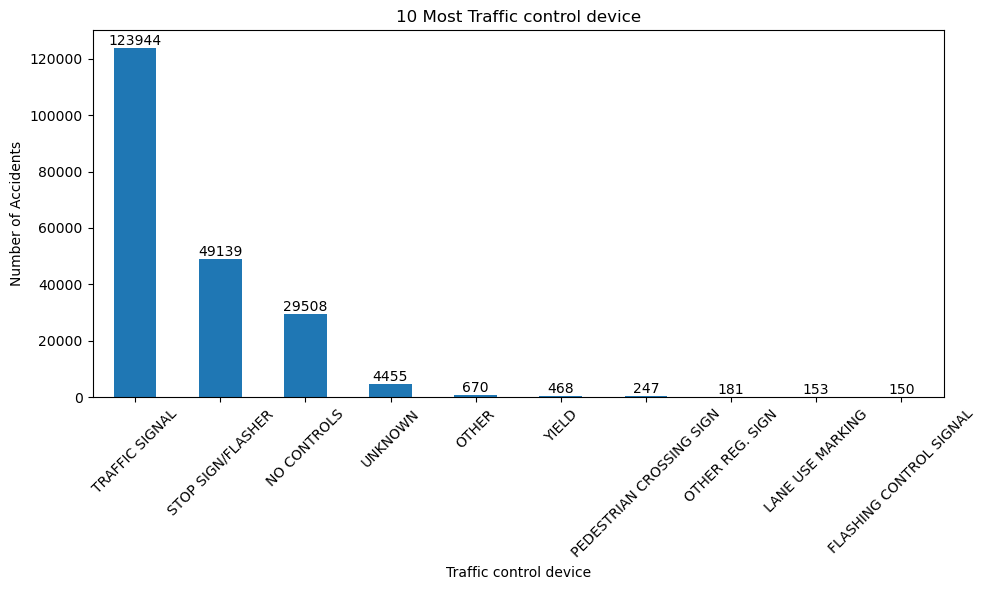

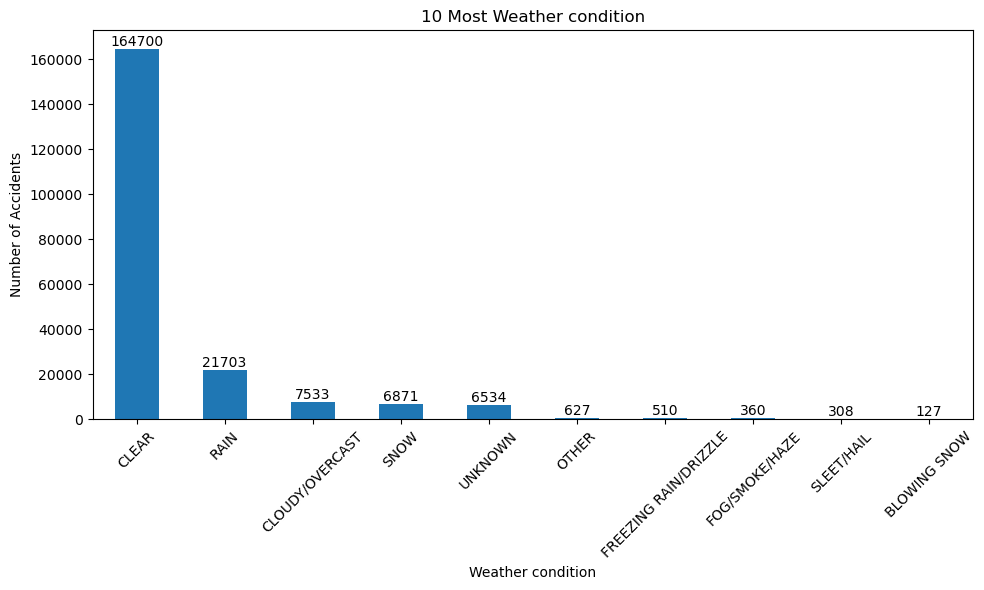

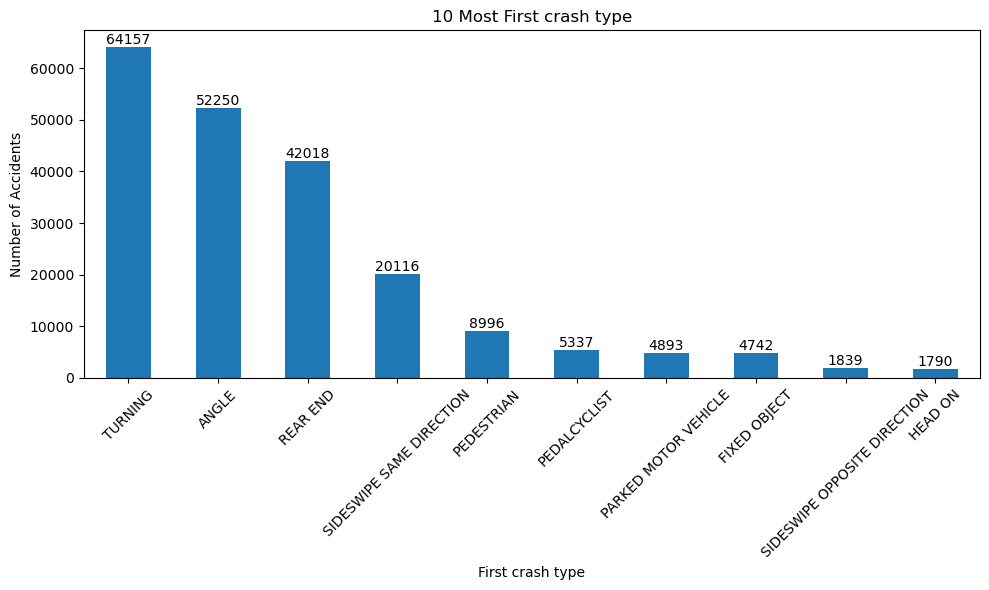

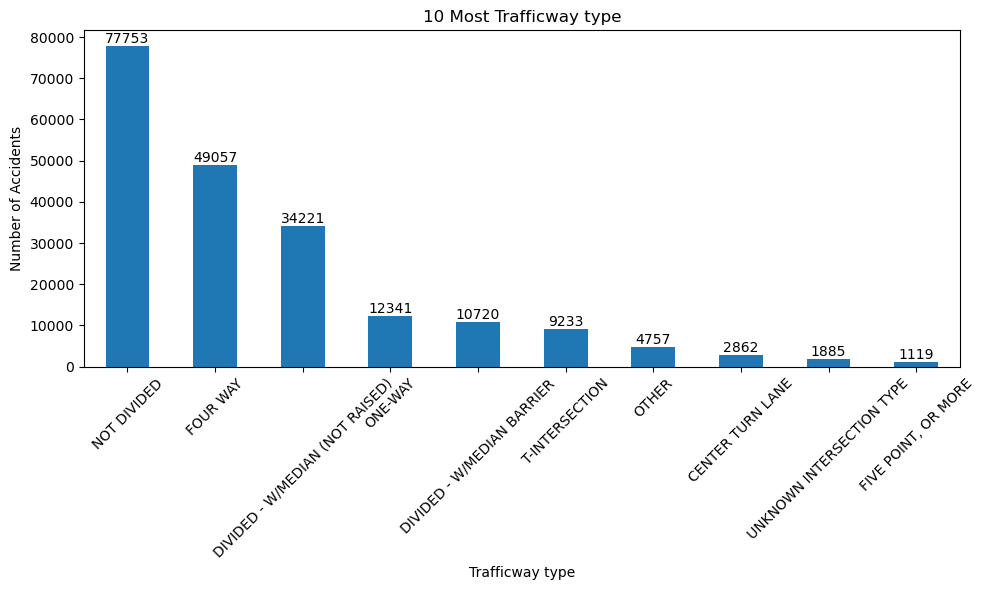

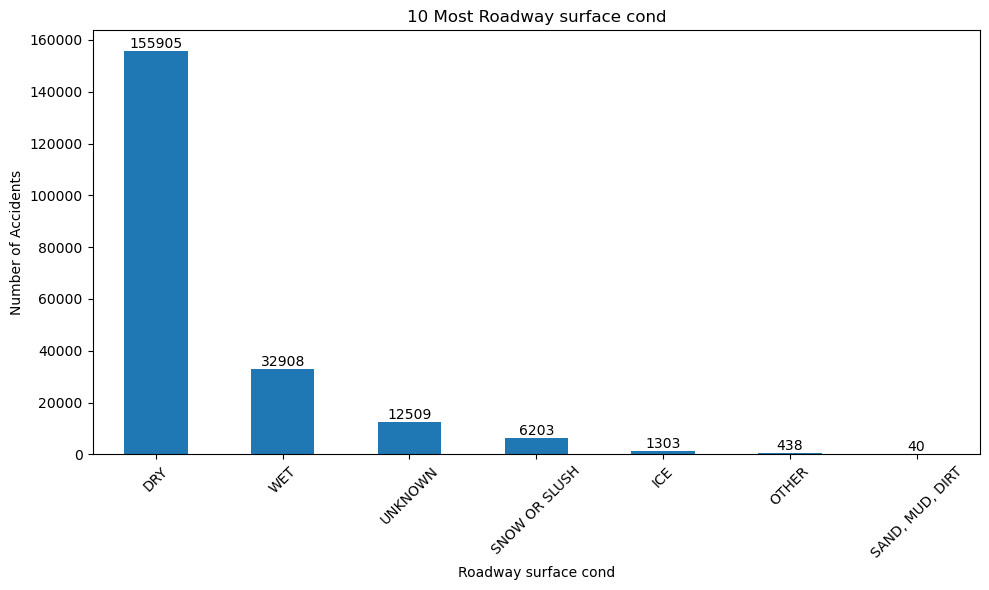

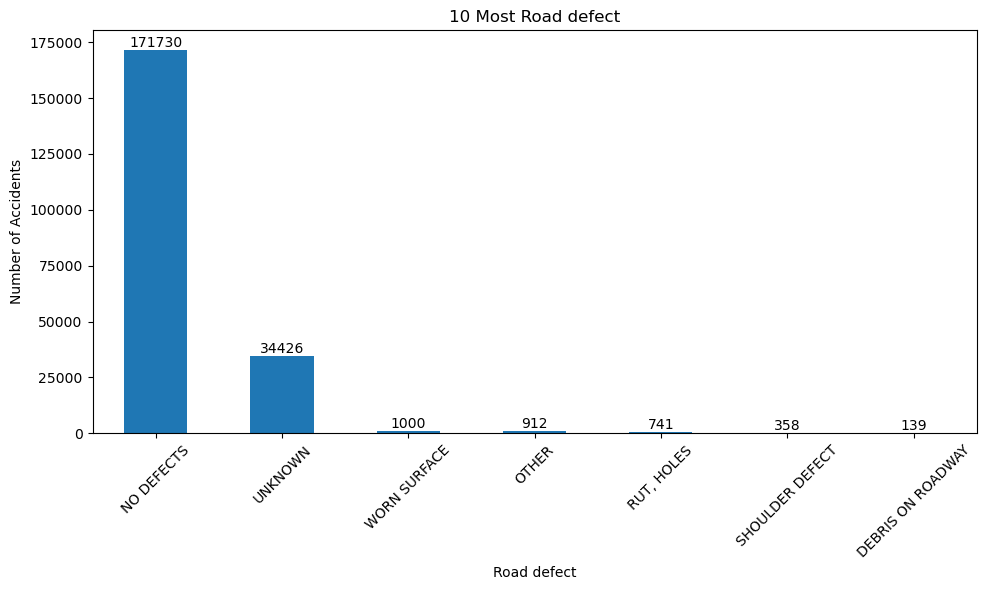

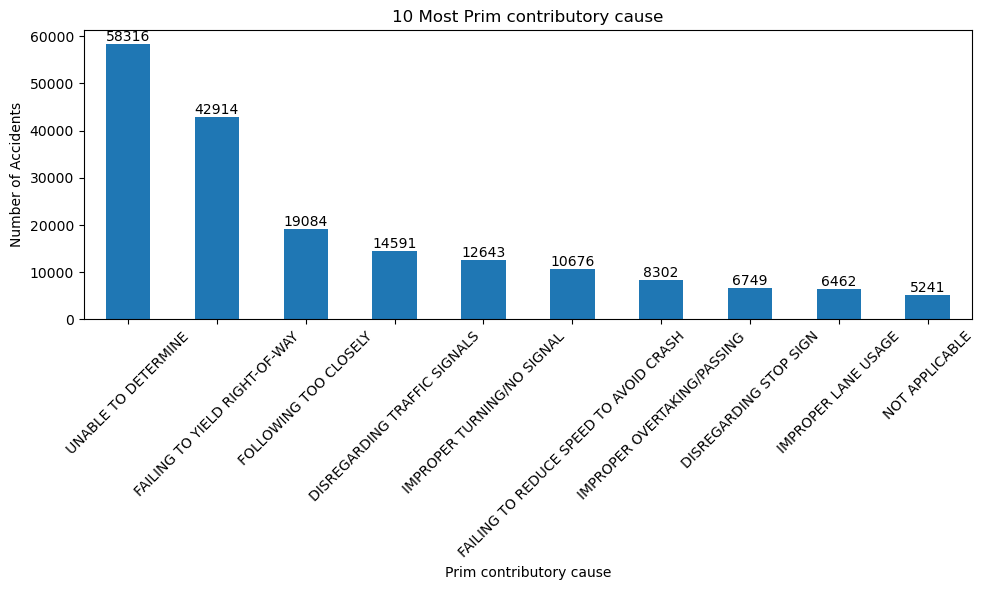

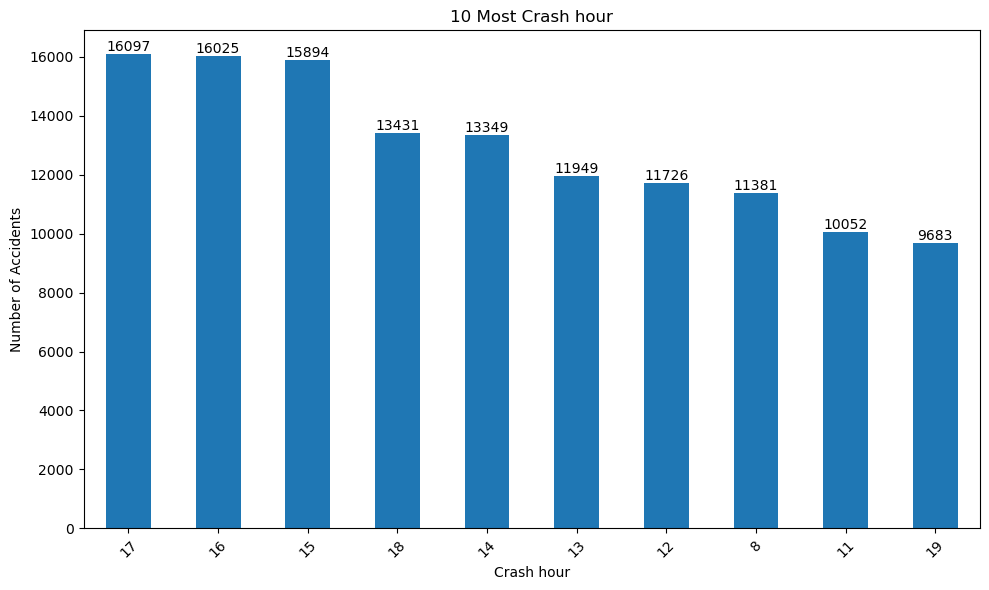

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Exploratory Data Analysis (EDA) - Bar Chart 10 Most Context
df = pd.read_csv("traffic_accidents.csv")

non_numeric_columns = [
    "traffic_control_device", "weather_condition", "first_crash_type", "trafficway_type", "roadway_surface_cond", "road_defect", "prim_contributory_cause", "crash_hour"]

for dt in non_numeric_columns:
    top_context = df[dt].value_counts().head(10) 
    title = dt.replace("_"," ").capitalize()
    
    # Bar Chart
    plt.figure(figsize=(10, 6))
    ax = top_context.plot(kind='bar')
    # Add label
    for i, value in enumerate(top_context):
        plt.text(i, value + 1, str(value), ha='center', va='bottom')
    plt.title(f"10 Most {title}")
    plt.xlabel(title)
    plt.ylabel("Number of Accidents")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

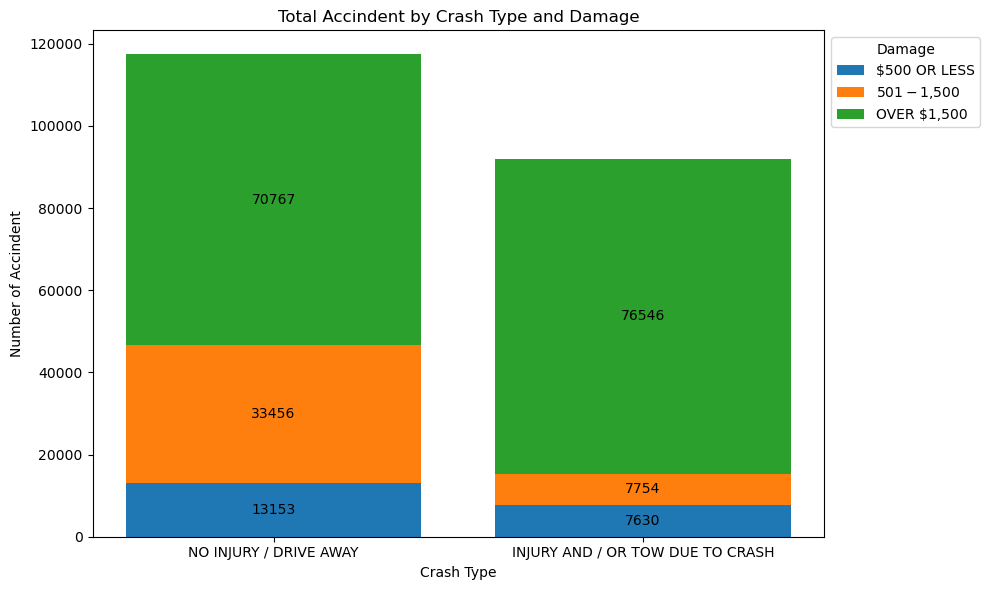

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("traffic_accidents.csv")

# Exploratory Data Analysis (EDA) - Stacked Bar Chart Comparison Between Crash Type and Damage 
# Dataset
context_group_counts = df.groupby(['crash_type', 'damage']).size().reset_index(name='Count')
stacked_data = context_group_counts.pivot(index='crash_type', columns='damage', values='Count').fillna(0)

# Ordering
stacked_data['Total'] = stacked_data.sum(axis=1)
stacked_data = stacked_data.sort_values(by='Total', ascending=False).head(7)
categories = stacked_data.columns[:-1] 
counts = stacked_data[categories].values 

# Plotting
context = stacked_data.index
fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(len(context))

# Plot each 'damage' as stack
for damage_index, group in enumerate(categories):
    p = ax.bar(context, counts[:, damage_index], label=group, bottom=bottom)
    bottom += counts[:, damage_index]
    ax.bar_label(p, label_type='center', fmt='%d')

# Customizing the plot
ax.set_title(f'Total Accindent by Crash Type and Damage')
ax.set_xlabel('Crash Type')
ax.set_ylabel('Number of Accindent')
ax.legend(title='Damage', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()
print("\n")

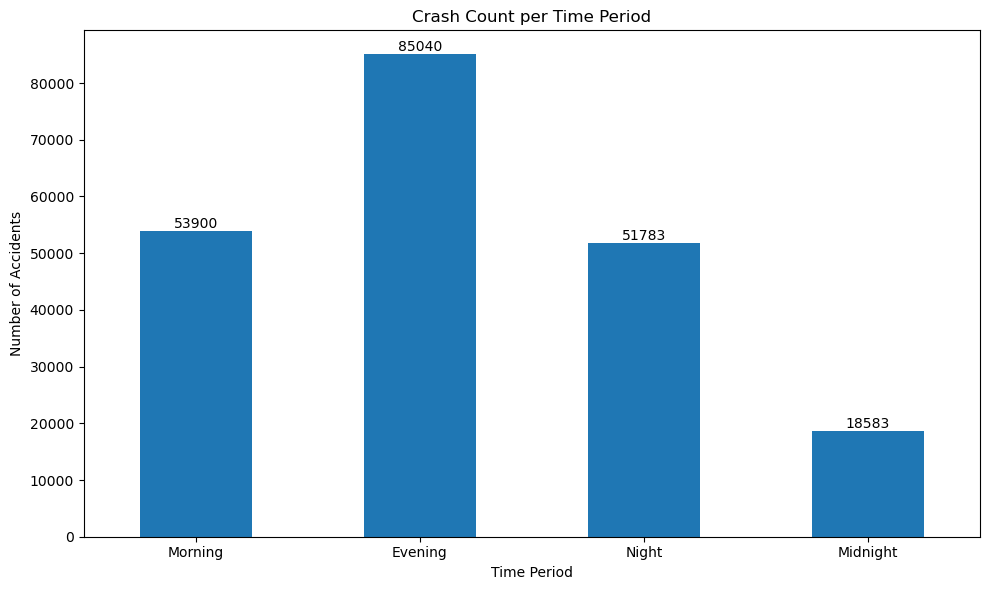

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Exploratory Data Analysis (EDA) - Bar Chart Crash Time Period
df = pd.read_csv("traffic_accidents.csv")

# Categorize Time
def categorize_time(hour):
    if 0 <= hour <= 5:
        return "Midnight"
    elif 6 <= hour <= 11:
        return "Morning"
    elif 12 <= hour <= 17:
        return "Evening"
    elif 18 <= hour <= 23:
        return "Night"

# Group by Period and Count
df['crash_time_period'] = df['crash_hour'].apply(categorize_time)
crash_grouped = df['crash_time_period'].value_counts().reindex(["Morning", "Evening", "Night","Midnight"])

# Bar Chart
plt.figure(figsize=(10, 6))
ax = crash_grouped.plot(kind='bar')
# Add label
for i, value in enumerate(crash_grouped):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("Crash Count per Time Period")
plt.xlabel("Time Period")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

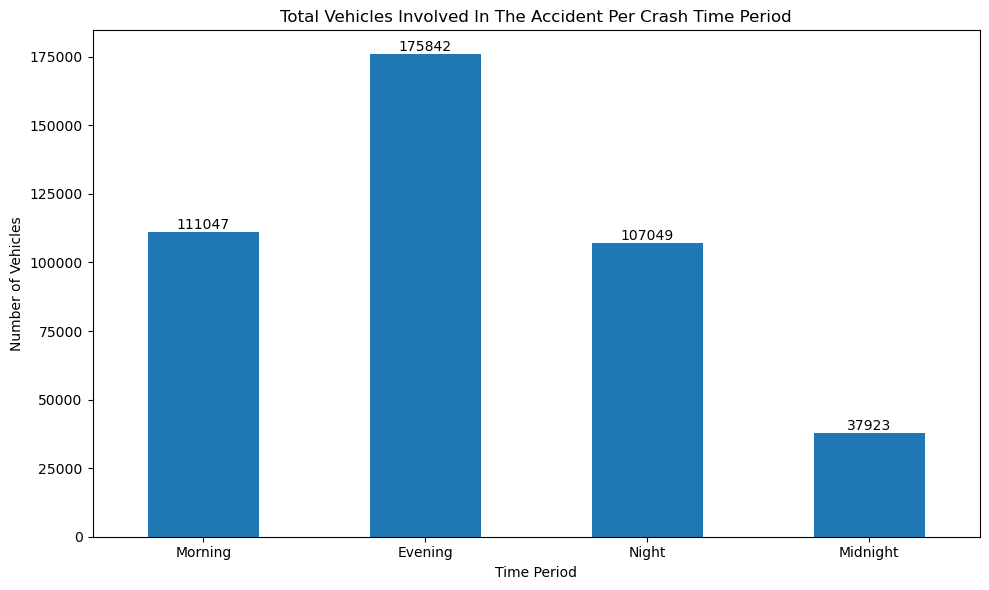

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Exploratory Data Analysis (EDA) - Bar Chart Total Vehicles Involved In The Accident Per Crash Time Period
df = pd.read_csv("traffic_accidents.csv")

# Categorize Time
def categorize_time(hour):
    if 0 <= hour <= 5:
        return "Midnight"
    elif 6 <= hour <= 11:
        return "Morning"
    elif 12 <= hour <= 17:
        return "Evening"
    elif 18 <= hour <= 23:
        return "Night"

# Group by Period and Count
df['crash_time_period'] = df['crash_hour'].apply(categorize_time)
crash_grouped = df.groupby('crash_time_period')['num_units'].sum().reindex(["Morning", "Evening", "Night","Midnight"])

# Bar Chart
plt.figure(figsize=(10, 6))
ax = crash_grouped.plot(kind='bar')
# Add label
for i, value in enumerate(crash_grouped):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("Total Vehicles Involved In The Accident Per Crash Time Period")
plt.xlabel("Time Period")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

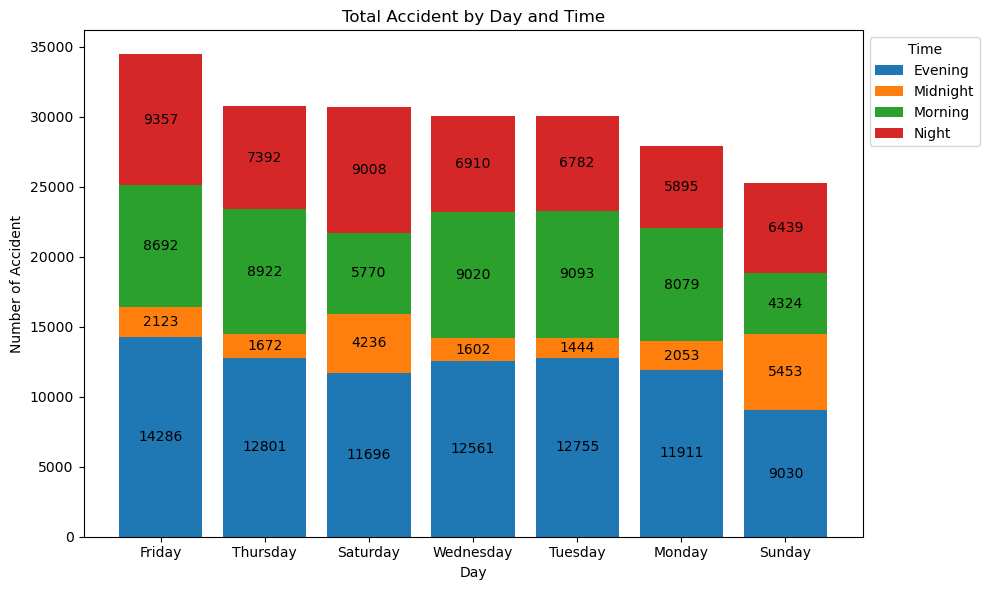

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exploratory Data Analysis (EDA) - Bar Chart Total Accidents Per Time and Day
df = pd.read_csv("traffic_accidents.csv")

# Extract Day and Hour from crash_date
df['crash_date'] = pd.to_datetime(df['crash_date'], format='%m/%d/%Y %I:%M:%S %p')
df['day'] = df['crash_date'].dt.day_name()
df['hour'] = df['crash_date'].dt.hour

# Categorize hour into time periods
def categorize_time(hour):
    if 0 <= hour <= 5:
        return "Midnight"
    elif 6 <= hour <= 11:
        return "Morning"
    elif 12 <= hour <= 17:
        return "Evening"
    elif 18 <= hour <= 23:
        return "Night"

df['time'] = df['hour'].apply(categorize_time)

context_group_counts = df.groupby(['day', 'time']).size().reset_index(name='Count')
stacked_data = context_group_counts.pivot(index='day', columns='time', values='Count').fillna(0)

# Ordering
stacked_data['Total'] = stacked_data.sum(axis=1)
stacked_data = stacked_data.sort_values(by='Total', ascending=False).head(7)
categories = stacked_data.columns[:-1]
counts = stacked_data[categories].values

# Plotting
context = stacked_data.index
fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(len(context))

# Plot each 'time' as stack
for damage_index, group in enumerate(categories):
    p = ax.bar(context, counts[:, damage_index], label=group, bottom=bottom)
    bottom += counts[:, damage_index]
    ax.bar_label(p, label_type='center', fmt='%d')

# Bar Chart
ax.set_title(f'Total Accident by Day and Time')
ax.set_xlabel('Day')
ax.set_ylabel('Number of Accident')
ax.legend(title='Time', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()
print("\n")

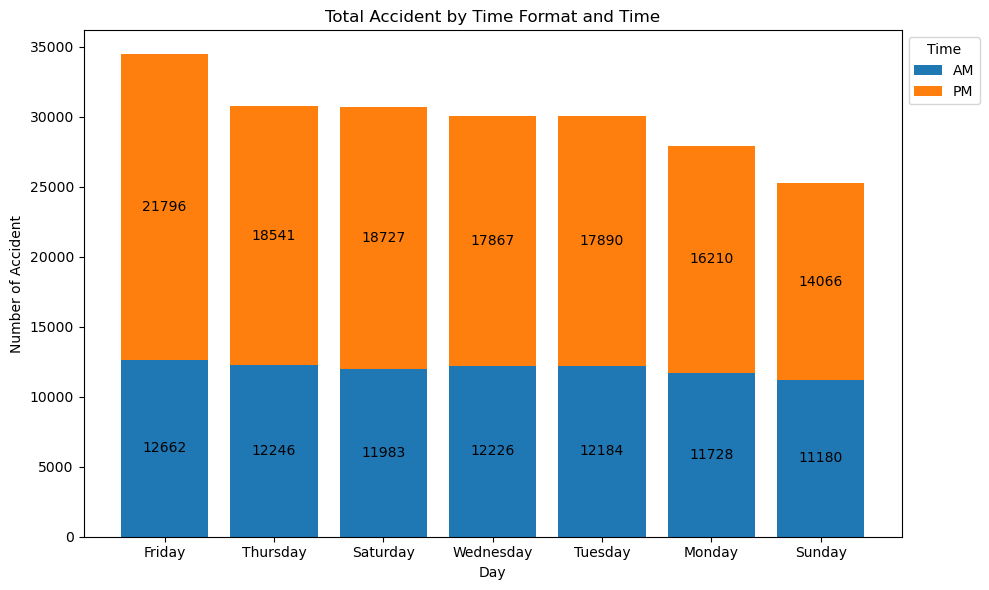

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exploratory Data Analysis (EDA) - Bar Chart Total Accidents Per Time Format and Day
df = pd.read_csv("traffic_accidents.csv")

# Extract Day and Hour from crash_date
df['crash_date'] = pd.to_datetime(df['crash_date'], format='%m/%d/%Y %I:%M:%S %p')
df['day'] = df['crash_date'].dt.day_name()
df['hour'] = df['crash_date'].dt.hour

# Categorize hour into time periods
def categorize_time(hour):
    if 0 <= hour <= 12:
        return "AM"
    else:
        return "PM"

df['time'] = df['hour'].apply(categorize_time)

context_group_counts = df.groupby(['day', 'time']).size().reset_index(name='Count')
stacked_data = context_group_counts.pivot(index='day', columns='time', values='Count').fillna(0)

# Ordering
stacked_data['Total'] = stacked_data.sum(axis=1)
stacked_data = stacked_data.sort_values(by='Total', ascending=False).head(7)
categories = stacked_data.columns[:-1]
counts = stacked_data[categories].values

# Plotting
context = stacked_data.index
fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(len(context))

# Plot each 'time' as stack
for damage_index, group in enumerate(categories):
    p = ax.bar(context, counts[:, damage_index], label=group, bottom=bottom)
    bottom += counts[:, damage_index]
    ax.bar_label(p, label_type='center', fmt='%d')

# Bar Chart
ax.set_title(f'Total Accident by Time Format and Time')
ax.set_xlabel('Day')
ax.set_ylabel('Number of Accident')
ax.legend(title='Time', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()
print("\n")